# RBE/CS549 Fall 2022: Computer Vision
## Homework 0: Alohomora

Author(s): 
Prof. Nitin J. Sanket (nsanket@wpi.edu), Lening Li (lli4@wpi.edu), Gejji, Vaishnavi Vivek (vgejji@wpi.edu)

Robotics Engineering Department,

Worcester Polytechnic Institute

Code adapted from CMSC733 at the University of Maryland, College Park.


## Phase 1




### Get the BSDS500 dataset

In [9]:
!wget https://raw.githubusercontent.com/leelening/rbe549/main/hw0/BSDS500.tar.xz
!tar -xvf BSDS500.tar.xz
!mv BSDS500/ /content/data/

'wget' is not recognized as an internal or external command,
operable program or batch file.
tar: Error opening archive: Failed to open 'BSDS500.tar.xz'
'mv' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
!wget https://raw.githubusercontent.com/leelening/rbe549/main/hw0/TxtFiles.tar.xz
!tar -xvf TxtFiles.tar.xz
!mv TxtFiles/ /content/data/

--2022-08-26 21:43:45--  https://raw.githubusercontent.com/leelening/rbe549/main/hw0/TxtFiles.tar.xz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55376 (54K) [application/octet-stream]
Saving to: ‘TxtFiles.tar.xz’

TxtFiles.tar.xz     100%[===================>]  54.08K  --.-KB/s    in 0.001s  

2022-08-26 21:43:45 (53.6 MB/s) - ‘TxtFiles.tar.xz’ saved [55376/55376]

TxtFiles/
TxtFiles/DirNamesTest.txt
TxtFiles/DirNamesTrain.txt
TxtFiles/LabelsTest.txt
TxtFiles/LabelsTrain.txt


In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

1. Generate Difference of Gaussian Filter Bank: (DoG)
2. Display all the filters in this filter bank and save image as DoG.png,
3. use command "cv2.imwrite(...)"

In [ ]:
import scipy.signal as sc
from numpy.ma.core import arange


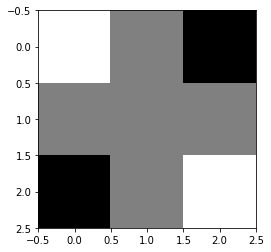

In [ ]:
"""
Generate Difference of Gaussian Filter Bank: (DoG)
Display all the filters in this filter bank and save image as DoG.png,
use command "cv2.imwrite(...)"
"""
def generate_dog(sigma):
	#gen sobel filter img
	sobel_x = np.array([	
			[-1,-2,-1],
			[0,0,0],
			[1,2,1]
		])
	sobel_y = np.array([
			[-1,0,1],
			[-2,0,2],
			[-1,0,1]
		])
	#create gaussian filter
	gaussian_weights = np.array([
			[1,2,1],
			[2,4,2],
			[1,2,1]
	])
	gaussian = sigma * gaussian_weights
	#convolve with gaussian filter
	# res = np.convolve(sobel_x, gaussian, "same")
	res_x = sc.convolve2d(sobel_x, gaussian, "same")
	res_y = sc.convolve2d(sobel_y, gaussian, "same")
	
	res = np.matmul(res_x, res_y)
 
	#show filter result
	# print(res_x)
	# norm_x = cv2.normalize(res_x, None, 0, 255, norm_type=cv2.NORM_MINMAX, dtype = cv2.CV_32F)
	# norm_y = cv2.normalize(res_y, None, 0, 255, norm_type=cv2.NORM_MINMAX, dtype = cv2.CV_32F)
	res = cv2.normalize(res, None, 0, 255, norm_type=cv2.NORM_MINMAX, dtype = cv2.CV_32F)
	
	# res = np.sqrt(np.square(norm_x) + np.square(norm_y))
	#create rotate function
	plt.imshow(res, cmap="gray")

def init():
	#read image
	# path = os.path.realpath(os.path.join(os.path.dirname(__file__), '..', 'BSDS500', 'Images', '1.jpg'))
	path = "data/Images/1.jpg"
	img = cv2.imread(path)
	if img is None:
		print('img not loaded')
		return
	img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
	plt.imshow(img)

	gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)	
	plt.imshow(gray, cmap="gray")
 
# init()
generate_dog(1)

In [ ]:

def gaussianFilter(sigma_x, sigma_y, kernel_size):
    #image = imread(image)
    # image = Image.open(image)
    # image = np.asarray(image)
    # #print(image)
    # filter_size = 2 * int(4 * sigma + 0.5) + 1
    if(kernel_size%2==0):
        print("kernel size has to be an odd no.")
        return
    gaussian_filter = np.zeros((kernel_size, kernel_size), np.float32)
    m = kernel_size//2
    n = kernel_size//2
    
    for x in range(-m, m+1):
        for y in range(-n, n+1):
            gaussian_filter[x+m, y+n] = np.exp(-((x**2/(2* sigma_x**2)) + (y**2/(2* sigma_y**2)))) / 2*np.pi*sigma_x*sigma_y
    
    # plt.imshow(gaussian_filter, cmap="gray")

    return gaussian_filter

#first order derivative of gaussian function is sobel filter
def sobelFilter(sigma_x, sigma_y, kernel_size):
  if(kernel_size%2==0):
      print("kernel size has to be an odd no.")
      return
  d_x = np.zeros((kernel_size, kernel_size), np.float32)
  d_y = np.zeros((kernel_size, kernel_size), np.float32)

  gaussian_filter = gaussianFilter(sigma_x, sigma_y, kernel_size)
  m = kernel_size//2
  n = kernel_size//2
  
  for x in range(-m, m+1):
    for y in range(-n, n+1):
      d_x[x+m, y+n] = -x * np.exp(-((x**2/(2* sigma_x**2)) + (y**2/(2* sigma_y**2)))) / 2*np.pi*(sigma_x**3)*sigma_y 
      #np.exp(-(x**2 + y**2)/(2* sigma**2)) / 2*np.pi*(sigma**4)
      d_y[x+m, y+n] = -y * np.exp(-((x**2/(2* sigma_x**2)) + (y**2/(2* sigma_y**2)))) / 2*np.pi*sigma_x*(sigma_y**3) 
      #np.exp(-(x**2 + y**2)/(2* sigma**2)) / 2*np.pi*(sigma**4)

  
  d_x = sc.convolve2d(gaussian_filter, d_x, "same")
  d_y = sc.convolve2d(gaussian_filter, d_y, "same")

  # sobel_filter = np.matmul(sobel_x, sobel_y)
  # plt.imshow(d_y, cmap="gray")

  return d_x, d_y

def dogFilter(vis):
  # gaussian_filter = gaussianFilter(1,5)
  
  dog_filter_bank = []
  

  #sigma=1
  j=0
  for scale in [7,11]:
    sobel_x, sobel_y = sobelFilter(1,1,scale)
    i=0
    for theta in arange(0,2*np.pi,np.pi/8):
      dog_filter = (np.cos(theta) * sobel_x) + (np.sin(theta) * sobel_y)
      dog_filter = cv2.normalize(dog_filter, None, 0, 255, norm_type=cv2.NORM_MINMAX, dtype = cv2.CV_32F)

      dog_filter_bank.append(dog_filter)

      i+=1
    j+=1

  if vis:
    fig, axs = plt.subplots(2, 16, figsize=(25, 25))
    plt.tight_layout()
    k=0
    for i in range(2):
      for j in range(16):
        axs[i,j].imshow(dog_filter_bank[k], cmap="gray")
        k+=1
  # res_y = sc.convolve2d(sobel_y, gaussian, "same")
  # res = np.matmul(res_x, res_y)
	# res = np.sqrt(np.square(norm_x) + np.square(norm_y))
	
  # create rotate function

  return dog_filter_bank

# gaussianFilter(1,1,5)
# sobelFilter(1,1,5)
dogFilter(True)
  


NameError: ignored


1. Generate Leung-Malik Filter Bank: (LM)
2. Display all the filters in this filter bank and save image as LM.png,
3. use command "cv2.imwrite(...)"


In [ ]:
def logFilter(sigma_x, sigma_y, kernel_size):
  if(kernel_size%2==0):
      print("kernel size has to be an odd no.")
      return
  d_x2 = np.zeros((kernel_size, kernel_size), np.float32)
  d_y2 = np.zeros((kernel_size, kernel_size), np.float32)

  gaussian_filter = gaussianFilter(sigma_x, sigma_y, kernel_size)
  m = kernel_size//2
  n = kernel_size//2
  
  for x in range(-m, m+1):
    for y in range(-n, n+1):
      d_x2[x+m, y+n] = (x**2/sigma_x**2 - 1) * np.exp(-((x**2/(2* sigma_x**2)) + (y**2/(2* sigma_y**2)))) / 2*np.pi*(sigma_x**3)*sigma_y #np.exp(-(x**2 + y**2)/(2* sigma**2)) / 2*np.pi*(sigma**4)
      d_y2[x+m, y+n] = (y**2/sigma_y**2 - 1) * np.exp(-((x**2/(2* sigma_x**2)) + (y**2/(2* sigma_y**2)))) / 2*np.pi*sigma_x*(sigma_y**3) #np.exp(-(x**2 + y**2)/(2* sigma**2)) / 2*np.pi*(sigma**4)

  
  # d_x2 = sc.convolve2d(gaussian_filter, d_x2, "same")
  # d_y2 = sc.convolve2d(gaussian_filter, d_y2, "same")

  # sobel_filter = np.matmul(sobel_x, sobel_y)
  # plt.imshow(d_y2, cmap="gray")

  return d_x2, d_y2

# logFilter(1,1,5)

def dp(sigma_x, sigma_y, theta, kernel_size):
  if(kernel_size%2==0):
      print("kernel size has to be an odd no.")
      return

  dx = np.zeros((kernel_size, kernel_size), np.float32)
  dy = np.zeros((kernel_size, kernel_size), np.float32)
  
  m = kernel_size//2
  n = kernel_size//2

  a = (np.cos(theta)**2/(2*sigma_x**2)) + (np.sin(theta)**2/(2*sigma_y**2))
  c = (np.sin(theta)**2/(2*sigma_x**2)) + (np.cos(theta)**2/(2*sigma_y**2))

  

  for x in range(-m, m+1):
    for y in range(-n, n+1):
      dx[x+m, y+n] = -a * x * np.exp(-(a * x**2 + c * y**2)) / np.pi*sigma_x*sigma_y
      dy[x+m, y+n] = -c * y * np.exp(-(a * x**2 + c * y**2)) / np.pi*sigma_x*sigma_y
  

  # f = cv2.normalize(dx + dy, None, 0, 255, norm_type=cv2.NORM_MINMAX, dtype = cv2.CV_32F)
  # plt.imshow(f,"gray")
  
  return dx + dy

# dp(1,1,0,15)

def d2p(sigma_x, sigma_y, theta, kernel_size):
  if(kernel_size%2==0):
      print("kernel size has to be an odd no.")
      return
  d_x2 = np.zeros((kernel_size, kernel_size), np.float32)
  d_y2 = np.zeros((kernel_size, kernel_size), np.float32)
  d_xy = np.zeros((kernel_size, kernel_size), np.float32)

  a = (np.cos(theta)**2/(2*sigma_x**2)) + (np.sin(theta)**2/(2*sigma_y**2))
  c = (np.sin(theta)**2/(2*sigma_x**2)) + (np.cos(theta)**2/(2*sigma_y**2))

  # # gaussian_filter = gaussianFilter(sigma_x, sigma_y, kernel_size)
  m = kernel_size//2
  n = kernel_size//2
  
  for x in range(-m, m+1):
    for y in range(-n, n+1):
      d_x2[x+m, y+n] = -a * (1-2*a*x**2) * np.exp(-(a * x**2 + c * y**2)) / np.pi*sigma_x*sigma_y
      d_y2[x+m, y+n] = -c * (1-2*c*y**2) * np.exp(-(a * x**2 + c * y**2)) / np.pi*sigma_x*sigma_y
      d_xy[x+m, y+n] = a * c * x * y * np.exp(-(a * x**2 + c * y**2)) / np.pi*sigma_x*sigma_y #np.exp(-((x**2/(2* sigma_x**2)) + (y**2/(2* sigma_y**2)))) / 2*np.pi*(sigma_x**3)*(sigma_y**3)

  # dpx = np.matmul(d_x2, d_y)
  # dpy = np.matmul(d_y2, d_x)
      
  # return dpx, dpy
  # return d_x2 + d_xy + d_y2 + d_xy
  return d_x2 + d_y2 + 2*d_xy

def lmFilter(kernel_size, vis):
  lms = [1,np.sqrt(2),2,2*np.sqrt(2)]
  lml = [np.sqrt(2),2,2*np.sqrt(2),4]
  lms_filter_bank = []
  lml_filter_bank = []

  ###################### LMS ########################
  for sigma in lms[:-1]:
    # d_x, d_y = sobelFilter(sigma, sigma*3, kernel_size)
    for theta in arange(0, np.pi, np.pi/6):
      # print(theta)
      # get first order deriv i.e sobel (elongation factor:3 i.e x=sigma, y=3sigma) for first 3 sigma not 4th
      # first_order = (np.cos(theta) * d_x) + (np.sin(theta) * d_y)
      first_order = dp(sigma, sigma*3, theta, kernel_size)
      first_order = cv2.normalize(first_order, None, 0, 255, norm_type=cv2.NORM_MINMAX, dtype = cv2.CV_32F)
      lms_filter_bank.append(first_order)

    # d_x2, d_y2 = d2p(sigma, sigma*3, kernel_size)
    for theta in arange(0, np.pi, np.pi/6):
      # get second order deriv i.e log (elongation factor:3) for first 3 sigma not 4th 
      # second_order = (np.cos(theta) * d_x2) + (np.sin(theta) * d_y2)
      second_order = d2p(sigma, sigma*3, theta, kernel_size)
      second_order = cv2.normalize(second_order, None, 0, 255, norm_type=cv2.NORM_MINMAX, dtype = cv2.CV_32F)
      lms_filter_bank.append(second_order)
    
  for sigma in lms:
    # get log (x=y=sigma)
    log_x, log_y = logFilter(sigma, sigma, kernel_size)
    log = cv2.normalize(log_x + log_y, None, 0, 255, norm_type=cv2.NORM_MINMAX, dtype = cv2.CV_32F)
    lms_filter_bank.append(log)
  
  for sigma in lms:
    # # get log (x=y=3sigma)
    log3_x, log3_y = logFilter(sigma*3, sigma*3, kernel_size)
    log3 = cv2.normalize(log3_x + log3_y, None, 0, 255, norm_type=cv2.NORM_MINMAX, dtype = cv2.CV_32F)
    lms_filter_bank.append(log3)
    
    # # get gaussian (x=y=sigma)
  for sigma in lms:
    gaussian = gaussianFilter(sigma, sigma, kernel_size)
    gaussian = cv2.normalize(gaussian, None, 0, 255, norm_type=cv2.NORM_MINMAX, dtype = cv2.CV_32F)
    lms_filter_bank.append(gaussian)

  ###################### LML ########################
  for sigma in lml[:-1]:
    # l_dx, l_dy = sobelFilter(sigma, sigma*3, kernel_size)
    for theta in arange(0, np.pi, np.pi/6):
      # print(theta)
      # get first order deriv i.e sobel (elongation factor:3 i.e x=sigma, y=3sigma) for first 3 sigma not 4th
      # first_order = (np.cos(theta) * d_x) + (np.sin(theta) * d_y)
      first_order = dp(sigma, sigma*3, theta, kernel_size)
      first_order = cv2.normalize(first_order, None, 0, 255, norm_type=cv2.NORM_MINMAX, dtype = cv2.CV_32F)
      lml_filter_bank.append(first_order)

    # d_x2, d_y2 = d2p(sigma, sigma*3, kernel_size)
    for theta in arange(0, np.pi, np.pi/6):
      # get second order deriv i.e log (elongation factor:3) for first 3 sigma not 4th 
      # second_order = (np.cos(theta) * d_x2) + (np.sin(theta) * d_y2)
      second_order = d2p(sigma, sigma*3, theta, kernel_size)
      second_order = cv2.normalize(second_order, None, 0, 255, norm_type=cv2.NORM_MINMAX, dtype = cv2.CV_32F)
      lml_filter_bank.append(second_order)
    
  for sigma in lml:
    # get log (x=y=sigma)
    log_x, log_y = logFilter(sigma, sigma, kernel_size)
    log = cv2.normalize(log_x + log_y, None, 0, 255, norm_type=cv2.NORM_MINMAX, dtype = cv2.CV_32F)
    lml_filter_bank.append(log)
  
  for sigma in lml:
    # # get log (x=y=3sigma)
    log3_x, log3_y = logFilter(sigma*3, sigma*3, kernel_size)
    log3 = cv2.normalize(log3_x + log3_y, None, 0, 255, norm_type=cv2.NORM_MINMAX, dtype = cv2.CV_32F)
    lml_filter_bank.append(log3)
    
    # # get gaussian (x=y=sigma)
  for sigma in lml:
    gaussian = gaussianFilter(sigma, sigma, kernel_size)
    gaussian = cv2.normalize(gaussian, None, 0, 255, norm_type=cv2.NORM_MINMAX, dtype = cv2.CV_32F)
    lml_filter_bank.append(gaussian)


  # do the same for lml
  # print(len(lms_filter_bank))
  if vis:
    fig, axs = plt.subplots(4, 12, figsize=(20, 20))
    k=0
    for i in range(0,4):
      for j in range(0,12):
        axs[i,j].imshow(lms_filter_bank[k], cmap="gray")
        k+=1

    # print(len(lms_filter_bank))
    fig2, axs2 = plt.subplots(4, 12, figsize=(20, 20))
    k=0
    for i in range(0,4):
      for j in range(0,12):
        axs2[i,j].imshow(lml_filter_bank[k], cmap="gray")
        k+=1

  return lms_filter_bank + lml_filter_bank

# lmFilter(49, True)


1. Generate Gabor Filter Bank: (Gabor)
2. Display all the filters in this filter bank and save image as Gabor.png,
3. use command "cv2.imwrite(...)"


[array([[129.76581 , 129.97409 , 130.17404 , ..., 130.17404 , 129.97409 ,
         129.76581 ],
        [119.15908 , 119.2373  , 119.31239 , ..., 119.31239 , 119.2373  ,
         119.15908 ],
        [ 92.685684,  92.439285,  92.202736, ...,  92.202736,  92.439285,
          92.685684],
        ...,
        [ 92.685684,  92.439285,  92.202736, ...,  92.202736,  92.439285,
          92.685684],
        [119.15908 , 119.2373  , 119.31239 , ..., 119.31239 , 119.2373  ,
         119.15908 ],
        [129.76581 , 129.97409 , 130.17404 , ..., 130.17404 , 129.97409 ,
         129.76581 ]], dtype=float32),
 array([[125.86913 , 127.951385, 129.8003  , ..., 102.45713 , 128.35167 ,
         155.0255  ],
        [130.28471 , 130.87952 , 130.12218 , ..., 166.44995 , 184.39159 ,
         189.35481 ],
        [129.30937 , 126.61331 , 122.97993 , ..., 189.61902 , 173.37413 ,
         145.14432 ],
        ...,
        [145.14432 , 173.37413 , 189.61902 , ..., 122.97993 , 126.61331 ,
         129.30937 

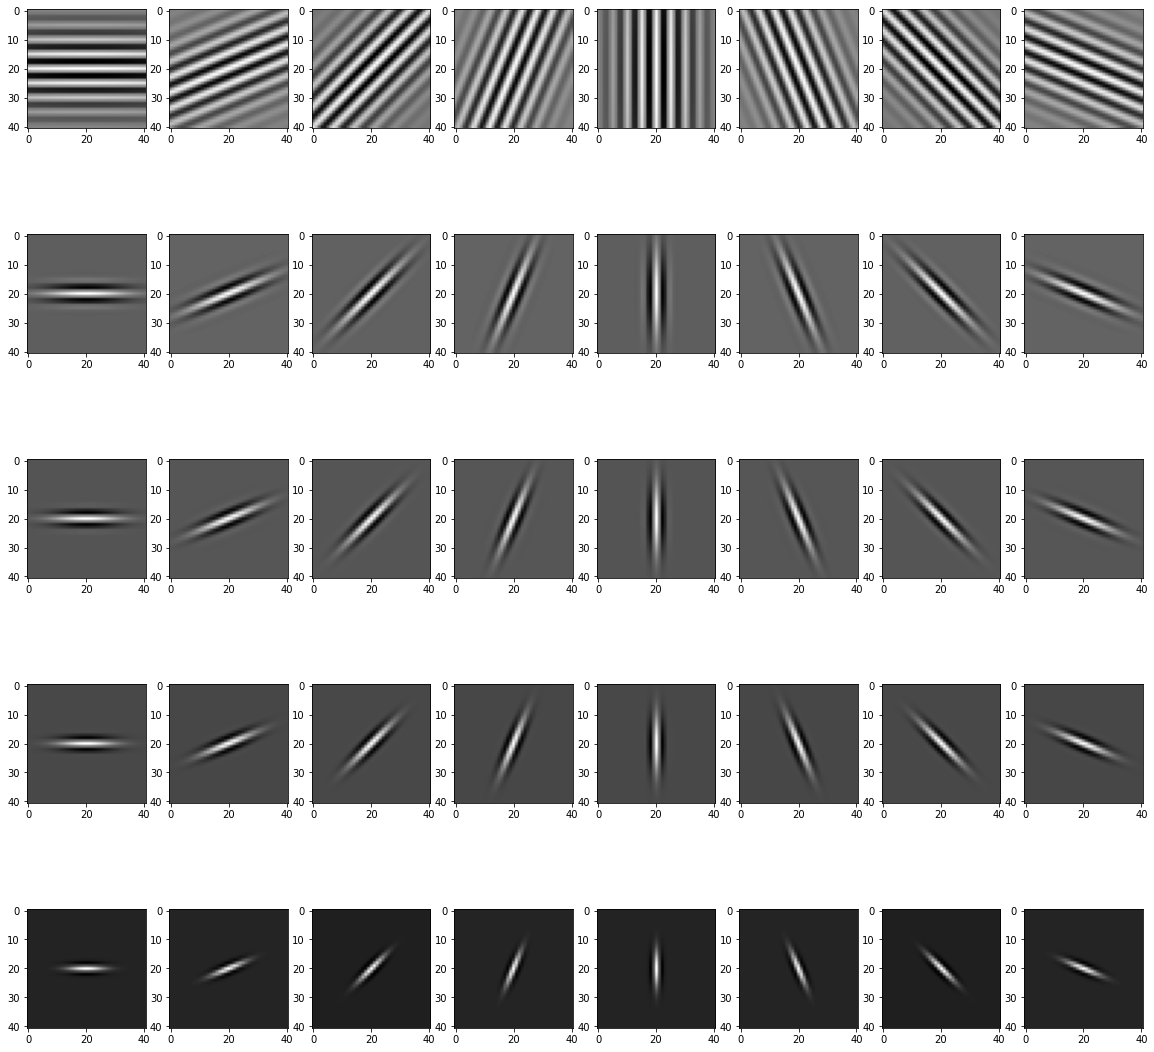

In [ ]:
def gabor(kernel_size, gamma, wavelength, phase, vis):
  if kernel_size%2==0:
    print("kernel size has to be an odd no.")
    return
  
  m = kernel_size//2
  n = kernel_size//2
  
  gabor_filter_bank = []
  sigma_list = [0.1,0.4,0.5,0.6,0.9]

# Lambda (λ) = 30; Theta (Ө) = 00

# Gamma (ɣ) = 0.25; Sigma (σ) = 10

# Psi (Ψ) = 0
  
  for sigma in sigma_list:
    # gauss = gaussianFilter(sigma, sigma, kernel_size)
    for theta in np.arange(0, np.pi, np.pi/8):
      gabor = np.zeros((kernel_size,kernel_size), np.float32)
      for x in range(-m, m+1):
        for y in range(-n, n+1):
          x_ = x*np.cos(theta) + y*np.sin(theta)
          y_ = -x*np.sin(theta) + y*np.cos(theta)
          # sin[x+m,y+n] = np.exp(1j * freq * (x* np.cos(theta) + y* np.sin(theta))) / (2 * np.pi * sigma * sigma)
          # gabor[x+m,y+n] = np.exp(-(x_**2 + (gamma**2) * (y_**2))/2* sigma**2 + 1j * (2*np.pi*x_/wavelength + phase))
          gabor[x+m,y+n] = np.exp(-((x_**2 + (gamma * y_)**2))/2* sigma**2) * np.cos((2*np.pi*x_)/wavelength + phase)
          # gabor[x+m,y+n] = np.exp(-(x_**2 + (gamma * y_)**2)/2* sigma**2 + 1j*(2*np.pi*x_/wavelength + phase)) 
            
      gabor = cv2.normalize(gabor, None, 0, 255, norm_type=cv2.NORM_MINMAX, dtype = cv2.CV_32F)
      gabor_filter_bank.append(gabor)

  if vis:
    k=0
    fig, axs = plt.subplots(5,8,figsize=(20,20))
    for i in range(len(sigma_list)):
      for j in range(8):
        axs[i,j].imshow(gabor_filter_bank[k], cmap="gray")
        k+=1
  return gabor_filter_bank

gabor(41,0.25,5,0,True)

In [ ]:
# def gabor2(kernel_size, freq):
#   if kernel_size%2==0:
#     print("kernel size has to be an odd no.")
#     return
  
#   m = kernel_size//2
#   n = kernel_size//2
  
#   gabor_filter_bank = []
#   sigma_list = [1,np.sqrt(2),2,2*np.sqrt(2),4]
#   fig, axs = plt.subplots(5,8,figsize=(20,20))

#   for sigma in sigma_list:
#     gauss = gaussianFilter(sigma, sigma, kernel_size)
#     sin = np.zeros((kernel_size,kernel_size), np.float32)
#     for theta in arange(0, np.pi, np.pi/8):
#       for x in range(-m, m+1):
#         for y in range(-n, n+1):
#           sin[x+m,y+n] = np.exp(1j * freq * (x* np.cos(theta) + y* np.sin(theta))) / (2 * np.pi * sigma * sigma)

#       gabor = np.multiply(gauss, sin)
#       gabor = cv2.normalize(gabor, None, 0, 255, norm_type=cv2.NORM_MINMAX, dtype = cv2.CV_32F)

#       gabor_filter_bank.append(gabor)

#   k=0
#   for i in range(len(sigma_list)):
#     for j in range(8):
#       axs[i,j].imshow(gabor_filter_bank[k], cmap="gray")
#       k+=1
#   return gabor_filter_bank

# # gabor2(19,np.pi)

1. Generate Half-disk masks
2. Display all the Half-disk masks and save image as HDMasks.png,
3. use command "cv2.imwrite(...)"

In [ ]:
import scipy.ndimage as sci
def genHalfMask():
  half_disk_bank = []
  kernel_sizes = [9, 15, 21]

  for kernel_size in kernel_sizes:
    m= kernel_size//2
    n= kernel_size//2
    cx, cy = 0,0
    r = m
    
    disk = np.zeros((kernel_size,kernel_size),np.float32)
    half_disk = np.zeros((kernel_size,kernel_size),np.float32)
    
    X, Y = np.ogrid[-m: m+1, -n: n+1]
    mask = X**2+Y**2 <= r**2

    disk[mask] = 255

    half_disk_left = np.zeros((kernel_size,kernel_size),np.float32)
    half_disk_right = np.zeros((kernel_size,kernel_size),np.float32)

    # half_disk_left[:,:n] = half_disk[:,:n]
    
    half_disk_left[:,:n] = disk[:,:n]
    half_disk_right[:,n:kernel_size] = disk[:,n:kernel_size]
    

    for angle in arange(0,180,22.5):
      rotated_left = sci.rotate(half_disk_left, angle, reshape=False)
      rotated_right = sci.rotate(half_disk_right, angle, reshape=False)

      _, rotated_left = cv2.threshold(rotated_left, 128, 255, cv2.THRESH_BINARY)
      _, rotated_right = cv2.threshold(rotated_right, 128, 255, cv2.THRESH_BINARY)
      half_disk_bank.append([rotated_left, rotated_right])
  
  #fix grayed out ones
  # rotated_binary = np.zeros_like(rotated)
  # rotated_binary[rotated>0] =255

  # half_disk = cv2.normalize(mask, None, 0, 255, norm_type=cv2.NORM_MINMAX, dtype = cv2.CV_32F)

  # for theta in arange(0, np.pi, np.pi/8):
    

  # plt.imshow(rotated, "gray")
  
  # for i in range(-m, m):
  #   for j in range(-n, 0):
  #     if np.sqrt((i-cx)**2 + (j-cy)**2)<= r:
  #       half_disk_left[i+m,j+n]=255
  #     else:
  #       half_disk_left[i+m,j+n]=0

  # for theta in arange(0,np.pi,np.pi/8):
  #   half_disk_right = np.zeros((kernel_size,kernel_size),np.float32)
  #   for i in range(-m, m+1):
  #     for j in range(-n, n+1):
  #       if(i-cx==0):
  #         if (cy-j)==0:
  #           angle = 0
  #         elif(cy-j)>0:
  #           angle = np.pi*1.5
  #         else:
  #           angle = np.pi/2
  #       else:
  #         angle = np.arctan((cy-j)/(i-cx))

        # if(i-cx==0):
        #   if (cy-j)==0:
        #     slope = 0
        #   elif(cy-j)>0:
        #     slope = -np.inf
        #   else:
        #     slope = np.inf
        # else:
        #   slope = (cy-j)/(i-cx)


        # print(angle,theta)
        # ((j-cy)/(i-cx)>=np.tan(theta) and (j-cy)/(i-cx) <=np.tan(theta+np.pi))
        # if (i-cx)**2 + (j-cy)**2<= r**2 and  (slope>=np.tan(theta) and slope<=np.tan(np.pi/2)) or (slope<=np.tan(theta) and slope>=np.tan(np.pi/2)):
        # if ((i-cx)**2 + (j-cy)**2<= r**2) and  ((angle>=theta and angle<=np.pi+theta)): #) or (angle<=theta and angle>=theta-np.pi)):
        #   half_disk_right[i+m,j+n]=255
        # # else:
        # #   half_disk_right[i+m,j+n]=0
  # half_disk_bank.append(half_disk)
    

  # half_disk = cv2.normalize(half_disk, None, 0, 255, norm_type=cv2.NORM_MINMAX, dtype = cv2.CV_32F)
  # k=0
  # fig,axs = plt.subplots(6,8,figsize=(10,10))
  # # axs[0].imshow(half_disk_left, "gray")
  # for i in range(6):
  #   for j in range(0,8,2):
  #     axs[i,j].imshow(half_disk_bank[k][0], "gray")
  #     axs[i,j+1].imshow(half_disk_bank[k][1], "gray")
  #     k+=1

  return half_disk_bank

# disk_bank = genHalfMask()

1. Generate Texton Map
2. Filter image using oriented gaussian filter bank


In [ ]:
from sklearn.cluster import KMeans

# import scipy.ndimage as sci
def texton_map(gray):
  kernel_size_lm = 49
  kernel_size_gabor = 41
  gamma = 0.25
  wavelength = 5 
  phase = 0
  
  dog_bank = dogFilter(False)
  lm_bank = lmFilter(kernel_size_lm,False)
  gabor_bank = gabor(kernel_size_gabor, gamma, wavelength, phase,False)

  # print(dog_bank, lm_bank)
  filter_bank = dog_bank #+ lm_bank + gabor_bank

  #texton input of size r*w*N
  filtered = []
  # d_x2 = sc.convolve2d(gaussian_filter, d_x2, "same")

  for filter in filter_bank:
    res = sc.convolve2d(gray, filter, mode='same')
    filtered.append(res)

  print(len(filtered), filtered[0].shape)

  input_arr = np.array(filtered)
  print(input_arr.shape)

  # gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  input_arr = np.swapaxes(input_arr,0,1)
  input_arr = np.swapaxes(input_arr,1,2)

  feed = input_arr.reshape(input_arr.shape[0]*input_arr.shape[1], input_arr.shape[2])
  
  kmeans = KMeans(n_clusters=64, random_state=12)
  kmeans_res = kmeans.fit_predict(feed)
  # round values to nearest int
  # kmeans_int = kmeans.cluster_centers_.round(0).astype(int)
  res = np.reshape(kmeans_res[kmeans_res],(input_arr.shape[0],input_arr.shape[1]))
  # print(res)

  res_viz = cv2.normalize(res, None, 0, 255, norm_type=cv2.NORM_MINMAX, dtype = cv2.CV_32F)
  plt.imshow(res_viz, "gray")
  # fig, axs = plt.subplots(1,2)
  # axs[0].imshow(gray, "gray")
  # axs[1].imshow(res, "gray")

  return res_viz
  
path = "data/Images/10.jpg"
img = cv2.imread(path)
if img is None:
  print('img not loaded')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
texton_map = texton_map(gray)

1. Generate texture ID's using K-means clustering
2. Display texton map and save image as TextonMap_ImageName.png,
3. use command "cv2.imwrite('...)"


1. Generate Texton Gradient (Tg)
2. Perform Chi-square calculation on Texton Map
3. Display Tg and save image as Tg_ImageName.png,
4. use command "cv2.imwrite(...)"


32 (481, 321)
(32, 481, 321)


/usr/local/lib/python3.7/dist-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


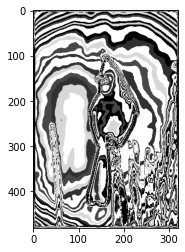

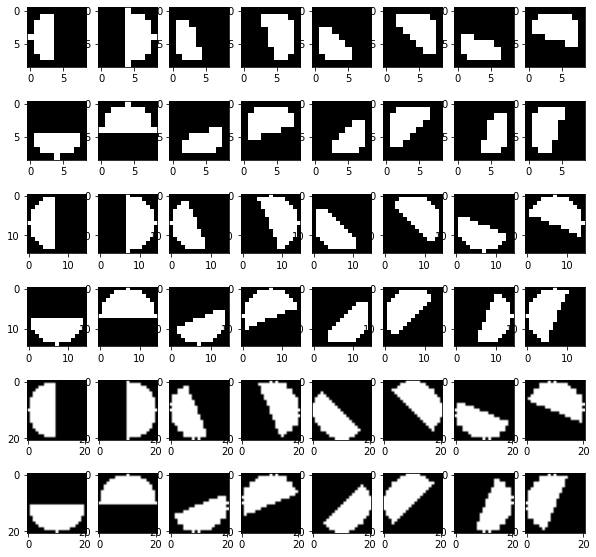

In [ ]:
path = "data/Images/10.jpg"
img = cv2.imread(path)
if img is None:
  print('img not loaded')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
texton = texton_map(gray)
disk_bank = genHalfMask()

np.save('texton.npy', texton)
np.save('disk_bank.npy', disk_bank)

In [ ]:
def texton_gradient(map,disk_bank):
  t_g = []
  for pair in disk_bank:  
    chi = map*0
    # print(disk_bank[0,0])
    for i in range(0,256):
      bin = map*0
      bin[map == i] = 1

      # print(len(pair))
      disk_l = pair[0]*0
      disk_l[pair[0]==255] = 1
      disk_r = pair[0]*0
      disk_r[pair[1]==255] = 1
      
      left = cv2.filter2D(src=bin, ddepth=-1, kernel=disk_l) #sc.convolve2d(bin, disk_bank[0,0], "same")
      right = cv2.filter2D(src=bin, ddepth=-1, kernel=disk_r) #sc.convolve2d(bin, disk_bank[0,1], "same")

      x = np.square(left-right) / np.sum(left+right)
      #remove nan
      x = np.nan_to_num(x)
      chi += x

    chi = chi*0.5
    t_g.append(chi)
  # plt.imshow(t_g[0], "gray")
  return t_g

# print(texton_map, disk_bank)
texton = np.load('texton.npy', allow_pickle=True)
disks = genHalfMask()
# plt.imshow(texton, "gray")

# print(texton)
# print(disks)


texton_gradient(texton, disks)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


KeyboardInterrupt: ignored

1. Generate Brightness Map
2. Perform brightness binning


In [ ]:
def brightness_map(img):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  feed = gray.reshape(gray.shape[0]*gray.shape[1],1)
  
  kmeans = KMeans(n_clusters=16, random_state=12, )
  kmeans_res = kmeans.fit_predict(feed)
  # round values to nearest int
  kmeans_round = kmeans.cluster_centers_.round(0)
  res = np.reshape(kmeans_round[kmeans_res],(gray.shape[0],gray.shape[1]))
  
  # fig, axs = plt.subplots(1,2)
  # axs[0].imshow(gray, "gray")
  # axs[1].imshow(res, "gray")

  return res
  

# path = "data/Images/10.jpg"
# img = cv2.imread(path)
# if img is None:
#   print('img not loaded')
# brightness_map(img)

1. Generate Brightness Gradient (Bg)
2. Perform Chi-square calculation on Brightness Map
3. Display Bg and save image as Bg_ImageName.png,
4. use command "cv2.imwrite(...)"



In [ ]:
def brightness_gradient(map,disk_bank):
  b_g = []
  for pair in disk_bank:  
    chi = map*0
    # print(disk_bank[0,0])
    for i in range(0,256):
      bin = map*0
      bin[map == i] = 1

      disk_l = pair[0]*0
      disk_l[pair[0]==255] = 1
      disk_r = pair[1]*0
      disk_r[pair[1]==255] = 1
      
      left = cv2.filter2D(src=bin, ddepth=-1, kernel=disk_l) #sc.convolve2d(bin, disk_bank[0,0], "same")
      right = cv2.filter2D(src=bin, ddepth=-1, kernel=disk_r) #sc.convolve2d(bin, disk_bank[0,1], "same")

      x = np.square(left-right) / np.sum(left+right)
      #remove nan
      x = np.nan_to_num(x)
      chi += x

    chi = chi*0.5
    b_g.append(chi)
  # plt.imshow(b_g[0], "gray")
  return b_g

# path = "data/Images/10.jpg"
# img = cv2.imread(path)
# if img is None:
#   print('img not loaded')
# bright = brightness_map(img)
# # plt.imshow(bright,"gray")
# disks = genHalfMask()

# brightness_gradient(bright, disks)


1. Generate Color Map
2. Perform color binning or clustering


In [ ]:
from sklearn.cluster import KMeans

def color_map(input):
  img = cv2.cvtColor(input, cv2.COLOR_BGR2RGB)
  feed = img.reshape(img.shape[0]*img.shape[1],3)
  
  kmeans = KMeans(n_clusters=16, random_state=12, )
  kmeans_res = kmeans.fit_predict(feed)
  # round values to nearest int
  # kmeans_round = kmeans.cluster_centers_.round(0)
  res = np.reshape(kmeans_res[kmeans_res],(img.shape[0],img.shape[1]))
  
  # print(res)

  res_viz = cv2.normalize(res, None, 0, 255, norm_type=cv2.NORM_MINMAX, dtype = cv2.CV_32F)

  # fig, axs = plt.subplots(1,2)
  # axs[0].imshow(img,)
  # axs[1].imshow(res_viz,)
  
  return res_viz

path = "data/Images/10.jpg"
img = cv2.imread(path)
if img is None:
  print('img not loaded')
color_map(img)


array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [255., 255., 255., ..., 255.,   0.,   0.],
       [255., 255., 255., ...,   0.,   0.,   0.],
       [  0., 255., 255., ...,   0.,   0.,   0.]], dtype=float32)




1. Generate Color Gradient (Cg)
2. Perform Chi-square calculation on Color Map
3. Display Cg and save image as Cg_ImageName.png,
4. use command "cv2.imwrite(...)"



In [ ]:
def color_gradient(map,disk_bank):
  c_g = []
  for pair in disk_bank:  
    chi = map*0
    # print(disk_bank[0,0])
    for i in range(0,256):
      bin = map*0
      bin[map == i] = 1

      disk_l = pair[0]*0
      disk_l[pair[0]==255] = 1
      disk_r = pair[1]*0
      disk_r[pair[1]==255] = 1
      
      left = cv2.filter2D(src=bin, ddepth=-1, kernel=disk_l) #sc.convolve2d(bin, disk_bank[0,0], "same")
      right = cv2.filter2D(src=bin, ddepth=-1, kernel=disk_r) #sc.convolve2d(bin, disk_bank[0,1], "same")

      x = np.square(left-right) / np.sum(left+right)
      #remove nan
      x = np.nan_to_num(x)
      chi += x

    chi = chi*0.5
    c_g.append(chi)
  # plt.imshow(c_g[0], "gray")
  return c_g

# path = "data/Images/10.jpg"
# img = cv2.imread(path)
# if img is None:
#   print('img not loaded')
# color = color_map(img)
# # plt.imshow(bright,"gray")
# disks = genHalfMask()

# color_gradient(color, disks)



1. Read Sobel Baseline
2. use command "cv2.imread(...)"


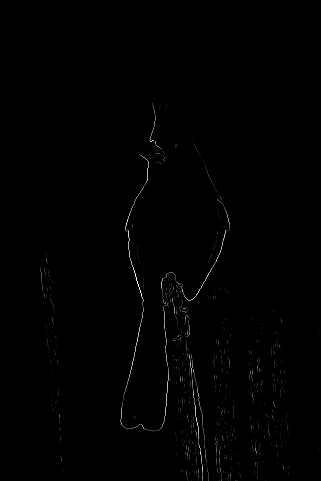

In [ ]:
from google.colab.patches import cv2_imshow
sobel_path = "data/SobelBaseline/10.png"
sobel = cv2.imread(sobel_path,cv2.IMREAD_GRAYSCALE)

cv2_imshow(sobel)




1. Read Canny Baseline
2. use command "cv2.imread(...)"



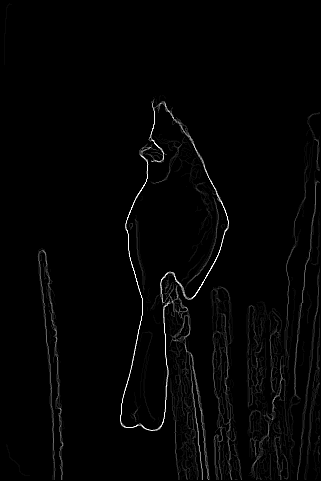

In [ ]:
canny_path = "data/CannyBaseline/10.png"
canny = cv2.imread(canny_path, cv2.IMREAD_GRAYSCALE)
cv2_imshow(canny)



1. Combine responses to get pb-lite output
2. Display PbLite and save image as PbLite_ImageName.png
3. use command "cv2.imwrite(...)"



In [ ]:
path = "data/Images/10.jpg"
img = cv2.imread(path)
if img is None:
  print('img not loaded')

t_g = texton_gradient(texton, disks)
b_g = brightness_gradient(bright, disks)
c_g = color_gradient(color, disks)

np.save('tg.npy', t_g)
np.save('bg.npy', b_g)
np.save('cg.npy', c_g)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


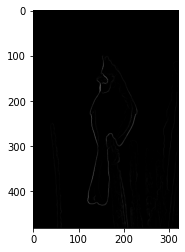

In [ ]:
def swapaxes(input_arr):
  input_arr = np.swapaxes(input_arr,0,1)
  input_arr = np.swapaxes(input_arr,1,2)
  return input_arr


disks = genHalfMask()

# color = color_map(img)
# bright = brightness_map(img)
# texton = np.load('texton.npy', allow_pickle=True)

t_g = np.load('tg.npy')
b_g = np.load('bg.npy')
c_g = np.load('cg.npy')

t_g = swapaxes(t_g)
b_g = swapaxes(b_g)
c_g = swapaxes(c_g)

tg_agg = np.sum(t_g, axis=2)/np.sum(t_g)
bg_agg = np.sum(b_g, axis=2)/np.sum(b_g)
cg_agg = np.sum(c_g, axis=2)/np.sum(c_g)


pb_out = (0.5 * sobel + 0.5 * canny) * (tg_agg + bg_agg + cg_agg) * 1/3
plt.imshow(pb_out,"gray")


## Phase 2

In [2]:
import time
import glob
import os
import sys
import matplotlib.pyplot as plt
import numpy as np

def tic():
    """
    Function to start timer
    Tries to mimic tic() toc() in MATLAB
    """
    StartTime = time.time()
    return StartTime

def toc(StartTime):
    """
    Function to stop timer
    Tries to mimic tic() toc() in MATLAB
    """
    return time.time() - StartTime

def FindLatestModel(CheckPointPath):
    """
    Finds Latest Model in CheckPointPath
    Inputs:
    CheckPointPath - Path where you have stored checkpoints
    Outputs:
    LatestFile - File Name of the latest checkpoint
    """
    FileList = glob.glob(CheckPointPath + '*.ckpt.index') # * means all if need specific format then *.csv
    LatestFile = max(FileList, key=os.path.getctime)
    # Strip everything else except needed information
    LatestFile = LatestFile.replace(CheckPointPath, '')
    LatestFile = LatestFile.replace('.ckpt.index', '')
    return LatestFile


def convertToOneHot(vector, NumClasses):
    """
    Inputs:
    vector - vector of argmax indexes
    NumClasses - Number of classes
    """
    return np.equal.outer(vector, np.arange(NumClasses)).astype(np.float)

### Neural Network Construction

In [3]:
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

def loss_fn():
    ###############################################
    # Fill your loss function of choice here!
    ###############################################
    
    return nn.CrossEntropyLoss()

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = loss_fn(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = loss_fn(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'loss': loss.detach(), 'acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'loss': epoch_loss.item(), 'acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], loss: {:.4f}, acc: {:.4f}".format(epoch, result['loss'], result['acc']))



class CIFAR10Model(ImageClassificationBase):
  def __init__(self, InputSize, OutputSize):
      """
      Inputs: 
      InputSize - Size of the Input
      OutputSize - Size of the Output
      """
      #############################s
      # Fill your network initialization of choice here!
      #############################
      # self.conv1 = nn.Conv2d(in_channels=3, out_channels=20,kernel_size=(5, 5))
		  # self.relu1 = nn.ReLU()
		  # self.maxpool1 = nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))
    
      # self.conv2 = nn.Conv2d(in_channels=20, out_channels=50, kernel_size=(5,5))
      # self.relu2 = nn.ReLU()
      # self.maxpool2 = nn.MaxPool2d(kernel_size=(2,2), stride=(2,2))

      # self.fc1 = nn.Linear(in_features=500, out_features=200)
      # self.relu3 = nn.ReLU()

      # self.fc2 = nn.Linear(in_features=200, out_features=10)
      # self.softmax = nn.LogSoftmax(dim=1)

      
      super(CIFAR10Model, self).__init__()

      self.network = nn.Sequential(
          nn.Conv2d(in_channels=3, out_channels=20,kernel_size=(5, 5)),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2)),

          nn.Conv2d(in_channels=20, out_channels=50, kernel_size=(5,5)),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2)),
          
          nn.Flatten(),
          nn.Linear(in_features=1250, out_features=500),
          nn.ReLU(),
          nn.Linear(in_features=500, out_features=OutputSize),
          nn.LogSoftmax(dim=1)
      )

      print(self.network)
      
  def forward(self, xb):
      """
      Input:
      xb is a MiniBatch of the current image
      Outputs:
      out - output of the network
      """
      #############################
      # Fill your network structure of choice here!
      #############################
      out = self.network(xb)
      print(xb.shape)
      # loss = loss_fn(out, y)
            
      return out

  def training_step(self, batch):
      X, y = batch

      X = X.to(device)
      y = y.to(device)
      # Predict output with forward pass
      y_hat = self.forward(X)
      #get the loss
      loss_wrapper = loss_fn()
      loss = loss_wrapper(y_hat,y)
      return loss
      # return super().training_step(batch)


  def validation_step(self, batch):
      X, y = batch

      X = X.to(device)
      y = y.to(device)
      # Predict output with forward pass
      y_hat = self.forward(X)
      #get the loss
      loss_wrapper = loss_fn()
      loss = loss_wrapper(y_hat,y)
      acc = accuracy(y_hat,y)
      return {'loss': loss.detach(), 'acc': acc}
      # return loss
      # return super().training_step(batch)
            

### Train your neural network

In [11]:
import torch
import torchvision
from torch.utils.tensorboard import SummaryWriter
from torchvision import datasets, transforms
from torch.optim import AdamW, SGD
from torchvision.datasets import CIFAR10
import cv2
import sys
import os
import numpy as np
import random
import skimage
import PIL
import os
import glob
import random
from skimage import data, exposure, img_as_float
import matplotlib.pyplot as plt
import numpy as np
import time
from torchvision.transforms import ToTensor
import argparse
import shutil
import string
from termcolor import colored, cprint
import math as m
from tqdm.notebook import tqdm

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

def SetupAll(CheckPointPath):
    """
    Inputs: 
    CheckPointPath - Path to save checkpoints/model
    Outputs:
    SaveCheckPoint - Save checkpoint every SaveCheckPoint iteration in every epoch, checkpoint saved automatically after every epoch
    ImageSize - Size of the image
    NumTrainSamples - length(Train)
    TrainLabels - Labels corresponding to Train
    NumClasses - Number of classes
    """
    # Read and Setup Labels
    LabelsPathTrain = '/data/TxtFiles/LabelsTrain.txt'
    TrainLabels = ReadLabels(LabelsPathTrain)

    # TrainLabels.to(device)
    # If CheckPointPath doesn't exist make the path
    if(not (os.path.isdir(CheckPointPath))):
       os.makedirs(CheckPointPath)
        
    # Save checkpoint every SaveCheckPoint iteration in every epoch, checkpoint saved automatically after every epoch
    SaveCheckPoint = 100 
    
    # Image Input Shape
    ImageSize = [32, 32, 3]
    NumTrainSamples = len(TrainSet)

    # Number of classes
    NumClasses = 10

    return SaveCheckPoint, ImageSize, NumTrainSamples, TrainLabels, NumClasses


def ReadLabels(LabelsPathTrain):
    if(not (os.path.isfile(LabelsPathTrain))):
        print('ERROR: Train Labels do not exist in '+LabelsPathTrain)
        sys.exit()
    else:
        TrainLabels = open(LabelsPathTrain, 'r')
        TrainLabels = TrainLabels.read()
        TrainLabels = map(float, TrainLabels.split())

    return TrainLabels
    

def ReadDirNames(ReadPath):
    """
    Inputs: 
    ReadPath is the path of the file you want to read
    Outputs:
    DirNames is the data loaded from /content/data/TxtFiles/DirNames.txt which has full path to all image files without extension
    """
    # Read text files
    DirNames = open(ReadPath, 'r')
    DirNames = DirNames.read()
    DirNames = DirNames.split()
    return DirNames

    
def GenerateBatch(TrainSet, TrainLabels, ImageSize, MiniBatchSize):
    """
    Inputs: 
    TrainSet - Variable with Subfolder paths to train files
    NOTE that Train can be replaced by Val/Test for generating batch corresponding to validation (held-out testing in this case)/testing
    TrainLabels - Labels corresponding to Train
    NOTE that TrainLabels can be replaced by Val/TestLabels for generating batch corresponding to validation (held-out testing in this case)/testing
    ImageSize is the Size of the Image
    MiniBatchSize is the size of the MiniBatch
   
    Outputs:
    I1Batch - Batch of images
    LabelBatch - Batch of one-hot encoded labels 
    """
    I1Batch = []
    LabelBatch = []
    
    ImageNum = 0
    while ImageNum < MiniBatchSize:
        # Generate random image
        RandIdx = random.randint(0, len(TrainSet)-1)
        
        ImageNum += 1
    	
    	  ##########################################################
    	  # Add any standardization or data augmentation here!
    	  ##########################################################

        I1, Label = TrainSet[RandIdx]
        I1 = I1.to(device)

        # Append All Images and Mask
        I1Batch.append(I1)
        LabelBatch.append(torch.tensor(Label))
        
    return torch.stack(I1Batch), torch.stack(LabelBatch)


def PrettyPrint(NumEpochs, DivTrain, MiniBatchSize, NumTrainSamples, LatestFile):
    """
    Prints all stats with all arguments
    """
    print('Number of Epochs Training will run for ' + str(NumEpochs))
    print('Factor of reduction in training data is ' + str(DivTrain))
    print('Mini Batch Size ' + str(MiniBatchSize))
    print('Number of Training Images ' + str(NumTrainSamples))
    if LatestFile is not None:
        print('Loading latest checkpoint with the name ' + LatestFile)              

def TrainOperation(TrainLabels, NumTrainSamples, ImageSize,
                   NumEpochs, MiniBatchSize, SaveCheckPoint, CheckPointPath,
                   DivTrain, LatestFile, TrainSet, LogsPath):
    """
    Inputs: 
    TrainLabels - Labels corresponding to Train/Test
    NumTrainSamples - length(Train)
    ImageSize - Size of the image
    NumEpochs - Number of passes through the Train data
    MiniBatchSize is the size of the MiniBatch
    SaveCheckPoint - Save checkpoint every SaveCheckPoint iteration in every epoch, checkpoint saved automatically after every epoch
    CheckPointPath - Path to save checkpoints/model
    DivTrain - Divide the data by this number for Epoch calculation, use if you have a lot of dataor for debugging code
    LatestFile - Latest checkpointfile to continue training
    TrainSet - The training dataset
    LogsPath - Path to save Tensorboard Logs
    Outputs:
    Saves Trained network in CheckPointPath and Logs to LogsPath
    """
    # Initialize the model
    model = CIFAR10Model(InputSize=3,OutputSize=10).to(device)
    ###############################################
    # Fill your optimizer of choice here!
    ###############################################
    Optimizer = SGD(model.parameters(), lr=1e-3)

    # Tensorboard
    # Create a summary to monitor loss tensor
    Writer = SummaryWriter(LogsPath)

    if LatestFile is not None:
        CheckPoint = torch.load(CheckPointPath + LatestFile + '.ckpt')
        # Extract only numbers from the name
        StartEpoch = int(''.join(c for c in LatestFile.split('a')[0] if c.isdigit()))
        model.load_state_dict(CheckPoint['model_state_dict'])
        print('Loaded latest checkpoint with the name ' + LatestFile + '....')
    else:
        StartEpoch = 0
        print('New model initialized....')
        
    for Epochs in tqdm(range(StartEpoch, NumEpochs)):
        NumIterationsPerEpoch = int(NumTrainSamples/MiniBatchSize/DivTrain)
        for PerEpochCounter in tqdm(range(NumIterationsPerEpoch)):
            Batch = GenerateBatch(TrainSet, TrainLabels, ImageSize, MiniBatchSize)
            
            # Predict output with forward pass
            LossThisBatch = model.training_step(Batch)
            #get the loss
            Optimizer.zero_grad()
            LossThisBatch.backward()
            Optimizer.step()
            
            # Save checkpoint every some SaveCheckPoint's iterations
            if PerEpochCounter % SaveCheckPoint == 0:
                # Save the Model learnt in this epoch
                SaveName =  CheckPointPath + str(Epochs) + 'a' + str(PerEpochCounter) + 'model.ckpt'
                
                torch.save({'epoch': Epochs,'model_state_dict': model.state_dict(),'optimizer_state_dict': Optimizer.state_dict(),'loss': LossThisBatch}, SaveName)
                print('\n' + SaveName + ' Model Saved...')

            result = model.validation_step(Batch)
            model.epoch_end(Epochs*NumIterationsPerEpoch + PerEpochCounter, result)
            # Tensorboard
            Writer.add_scalar('LossEveryIter', result["loss"], Epochs*NumIterationsPerEpoch + PerEpochCounter)
            Writer.add_scalar('Accuracy', result["acc"], Epochs*NumIterationsPerEpoch + PerEpochCounter)
            # If you don't flush the tensorboard doesn't update until a lot of iterations!
            Writer.flush()

        # Save model every epoch
        SaveName = CheckPointPath + str(Epochs) + 'model.ckpt'
        torch.save({'epoch': Epochs,'model_state_dict': model.state_dict(),'optimizer_state_dict': Optimizer.state_dict(),'loss': LossThisBatch}, SaveName)
        print('\n' + SaveName + ' Model Saved...')
        


# Default Hyperparameters
NumEpochs = 50
TrainSet = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=ToTensor())
DivTrain = 1.0
MiniBatchSize = 1
LoadCheckPoint = 0
CheckPointPath = "/Checkpoints/"
LogsPath = "/Logs"

# Setup all needed parameters including file reading
SaveCheckPoint, ImageSize, NumTrainSamples, TrainLabels, NumClasses = SetupAll(CheckPointPath)

# Find Latest Checkpoint File
if LoadCheckPoint==1:
    LatestFile = FindLatestModel(CheckPointPath)
else:
    LatestFile = None

# Pretty print stats
PrettyPrint(NumEpochs, DivTrain, MiniBatchSize, NumTrainSamples, LatestFile)

TrainOperation(TrainLabels, NumTrainSamples, ImageSize,
                NumEpochs, MiniBatchSize, SaveCheckPoint, CheckPointPath,
                DivTrain, LatestFile, TrainSet, LogsPath)

Using cuda device
Files already downloaded and verified
ERROR: Train Labels do not exist in /data/TxtFiles/LabelsTrain.txt


SystemExit: 

### Test your neural network

In [ ]:
import cv2
import os
import sys
import glob
import random
from skimage import data, exposure, img_as_float
import matplotlib.pyplot as plt
import numpy as np
import time
from torchvision.transforms import ToTensor
import argparse
import shutil
import string
import math as m
from sklearn.metrics import confusion_matrix
from tqdm.notebook import tqdm
import torch

def SetupAll():
    """
    Outputs:
    ImageSize - Size of the Image
    """   
    # Image Input Shape
    ImageSize = [32, 32, 3]

    return ImageSize

def StandardizeInputs(Img):
    ##########################################################################
    # Add any standardization or cropping/resizing if used in Training here!
    ##########################################################################
    

    return Img
    
def ReadImages(Img):
    """
    Outputs:
    I1Combined - I1 image after any standardization and/or cropping/resizing to ImageSize
    I1 - Original I1 image for visualization purposes only
    """    
    I1 = Img
    
    if(I1 is None):
        # OpenCV returns empty list if image is not read! 
        print('ERROR: Image I1 cannot be read')
        sys.exit()
        
    I1S = StandardizeInputs(np.float32(I1))

    I1Combined = np.expand_dims(I1S, axis=0)

    return I1Combined, I1
                

def TestOperation(ImageSize, ModelPath, TestSet, LabelsPathPred):
    """
    Inputs: 
    ImageSize is the size of the image
    ModelPath - Path to load trained model from
    TestSet - The test dataset
    LabelsPathPred - Path to save predictions
    Outputs:
    Predictions written to /content/data/TxtFiles/PredOut.txt
    """
    # Predict output with forward pass, MiniBatchSize for Test is 1
    model = CIFAR10Model(InputSize=3*32*32,OutputSize=10) 
    
    CheckPoint = torch.load(ModelPath)
    model.load_state_dict(CheckPoint['model_state_dict'])
    print('Number of parameters in this model are %d ' % len(model.state_dict().items()))
    
    OutSaveT = open(LabelsPathPred, 'w')

    for count in tqdm(range(len(TestSet))): 
        Img, Label = TestSet[count]
        Img, ImgOrg = ReadImages(Img)
        PredT = torch.argmax(model(torch.tensor(Img).to(device))).item()

        OutSaveT.write(str(PredT)+'\n')
    OutSaveT.close()

def Accuracy(Pred, GT):
    """
    Inputs: 
    Pred are the predicted labels
    GT are the ground truth labels
    Outputs:
    Accuracy in percentage
    """
    return (np.sum(np.array(Pred)==np.array(GT))*100.0/len(Pred))

def ReadLabels(LabelsPathTest, LabelsPathPred):
    if(not (os.path.isfile(LabelsPathTest))):
        print('ERROR: Test Labels do not exist in '+LabelsPathTest)
        sys.exit()
    else:
        LabelTest = open(LabelsPathTest, 'r')
        LabelTest = LabelTest.read()
        LabelTest = map(float, LabelTest.split())

    if(not (os.path.isfile(LabelsPathPred))):
        print('ERROR: Pred Labels do not exist in '+LabelsPathPred)
        sys.exit()
    else:
        LabelPred = open(LabelsPathPred, 'r')
        LabelPred = LabelPred.read()
        LabelPred = map(float, LabelPred.split())
        
    return LabelTest, LabelPred

def ConfusionMatrix(LabelsTrue, LabelsPred):
    """
    LabelsTrue - True labels
    LabelsPred - Predicted labels
    """

    # Get the confusion matrix using sklearn.
    LabelsTrue, LabelsPred = list(LabelsTrue), list(LabelsPred)
    cm = confusion_matrix(y_true=LabelsTrue,  # True class for test-set.
                          y_pred=LabelsPred)  # Predicted class.

    # Print the confusion matrix as text.
    for i in range(10):
        print(str(cm[i, :]) + ' ({0})'.format(i))

    # Print the class-numbers for easy reference.
    class_numbers = [" ({0})".format(i) for i in range(10)]
    print("".join(class_numbers))

    print('Accuracy: '+ str(Accuracy(LabelsPred, LabelsTrue)), '%')


ModelPath = "/content/Checkpoints/0a100model.ckpt"
LabelsPath = "/content/data/TxtFiles/LabelsTest.txt"
TestSet = CIFAR10(root='data/', train=False)


# Setup all needed parameters including file reading
ImageSize = SetupAll()

# Define PlaceHolder variables for Input and Predicted output
LabelsPathPred = '/content/data/TxtFiles/PredOut.txt' # Path to save predicted labels

TestOperation(ImageSize, ModelPath, TestSet, LabelsPathPred)

# Plot Confusion Matrix
LabelsTrue, LabelsPred = ReadLabels(LabelsPath, LabelsPathPred)
ConfusionMatrix(LabelsTrue, LabelsPred) 